[ 0.00607365  0.35169047  0.25214595 -0.16531427 -0.38607465 -0.18750306
  0.12576486  0.20989368  0.13180611  0.06119954 -0.02888591 -0.06393384
  0.0503976   0.06813469 -0.20367687 -0.4175441  -0.13604807  0.41777874
  0.53337767  0.06857592 -0.31205649 -0.20693355  0.04033205  0.02684629
 -0.13869637 -0.06193632  0.23069799  0.2375535  -0.11308088 -0.34103475
 -0.24014799  0.04110684  0.3486335   0.47218549  0.20622147 -0.26393792
 -0.47874033 -0.33792236 -0.06820105  0.18997767  0.36586937  0.34495235
  0.08605947 -0.19714874 -0.25461497 -0.17736728 -0.18731854 -0.17725602
  0.07485461  0.38840195  0.41600056  0.16905164 -0.11672622 -0.2786903
 -0.27580199 -0.22039889 -0.12518564  0.16561912  0.44966077  0.34421011
 -0.01385422 -0.26280926 -0.30603265 -0.16669971  0.04235748  0.09714258
  0.00091435  0.01132359  0.16301899  0.20833452  0.01467817 -0.21278495
 -0.16160985  0.08015055  0.11865017 -0.10742591 -0.23717231 -0.04043962
  0.22848114  0.21380782  0.00641609 -0.03688874  0.

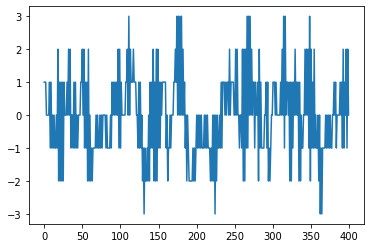

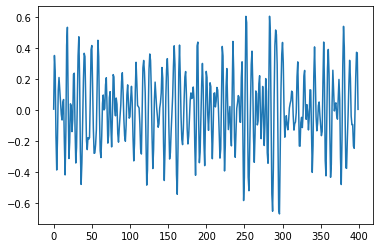

2
2
48000
14481839
NONE
not compressed


KeyboardInterrupt: 

In [14]:
import pyaudio
import wave
import struct

import numpy as np
import matplotlib.pyplot as plt
from array import array
from struct import pack

from scipy.signal import filtfilt
from scipy import stats
import scipy

def bandpassfilter(signal): #FUNCION PARA FILTRO PASABANDAS
    
    fs = 200.0
    highcut = 50.0
    lowcut = 20.0
    
    nyq = 0.5 * fs
    low = lowcut/nyq
    high = highcut/nyq
    
    order = 2
    
    b, a = scipy.signal.butter(order,[low,high], 'bandpass', analog=False)
    y = scipy.signal.filtfilt(b,a,signal,axis=0)
    
    return(y)
    
    

def play(file): #FUNCION PARA REPRODUCIR ARCHIVO WAV
    CHUNK = 200
    
    wf = wave.open("Audio1.wav",'rb')
    
    n_channels = wf.getnchannels()      # Number of channels. (1=Mono, 2=Stereo).
    sample_width = wf.getsampwidth()    # Sample width in bytes.
    framerate = wf.getframerate()       # Frame rate.
    n_frames = wf.getnframes()          # Number of frames.
    comp_type = wf.getcomptype()        # Compression type (only supports "NONE").
    comp_name = wf.getcompname()        # Compression name.
    
    p = pyaudio.PyAudio()
    
    stream = p.open(format=p.get_format_from_width(wf.getsampwidth()),
                channels=wf.getnchannels(),
                rate=wf.getframerate(),
                output=True)
    
    data = wf.readframes(CHUNK) #LEE EL PRIMER BLOQUE DE INFORMACION, GENERA UN ARREGLO DE BYTES
    #print (len(data))
    #print (type(data))
    
    
    stream.write(data) #REPRODUCE EL PRIMER BLOQUE DE INFORMACION 
    
    data_np = np.frombuffer(data,dtype=np.int16) #CONVIERTE EL ARREGLO DE BYTES A UN ARREGLO DE ENTEROS INT16
    
    data_filt = bandpassfilter(data_np) #APLICA FILTRO PASABANDAS A EL ARREGLO DE ENTEROS
    
    data_pru = data_filt.tobytes() #CONVIERTE EL ARREGLO FILTRADO NUEVAMENTE A BYTES
    
    print(data_filt)
    print (type(data_filt))
    print(len(data_filt))
    
    #print (data_pru)
    plt.plot(data_np)
    plt.show()
    
    plt.plot(data_filt)
    plt.show()
    
    print (n_channels)   # Number of channels. (1=Mono, 2=Stereo).
    print (sample_width)   # Sample width in bytes.
    print (framerate)     # Frame rate.
    print (n_frames)    # Number of frames.
    print (comp_type)        # Compression type (only supports "NONE").
    print (comp_name)
    
    while len(data)>0:
        
        stream.write(data) #
        data = wf.readframes(CHUNK)
        #data_np = np.frombuffer(data,dtype=np.int16)
        #data_filt = bandpassfilter(data_np)
        #data_pru = data_filt.tobytes()
        
   
    stream.stop_stream()
    stream.close()
        
    
    
    p.terminate()
    
play("Audio1.wav")        